# Introduction to Artificial Neural Networks with Keras

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Perceptron

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

<ipython-input-3-12e8ccb68ef0>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [6]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## Implementing MLPs with Keras

In [38]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
tf.__version__

'2.5.0'

In [10]:
keras.__version__

'2.5.0'

### Building an Image Classifier

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step

In [13]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Creating the model using Sequential API

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
model.get_layer('dense') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 0.04053476,  0.01062689, -0.06727006, ..., -0.03822708,
        -0.03237564, -0.01391913],
       [ 0.02830018,  0.00393081,  0.03756748, ..., -0.00406401,
        -0.01110797,  0.05505048],
       [-0.00043131, -0.06512833,  0.04003368, ...,  0.02515577,
         0.05025698,  0.00742503],
       ...,
       [ 0.07412249,  0.03815781,  0.00975761, ...,  0.06519414,
        -0.06190557,  0.02042581],
       [ 0.03042764, -0.06004529,  0.02858808, ...,  0.0538938 ,
        -0.05137718,  0.02119906],
       [-0.01320142,  0.03855656, -0.03662205, ...,  0.06336722,
        -0.06880235,  0.03022803]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd', metrics=['accuracy']
)

In [28]:
history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7135 - accuracy: 0.7640 - val_loss: 0.5096 - val_accuracy: 0.8222

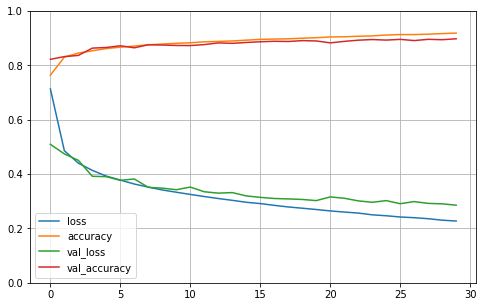

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 63.0776 - accuracy: 0.8468


[63.07763671875, 0.8468000292778015]

#### Using the model to make predictions

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using hte Sequential API

In [39]:
housing = fetch_california_housing()

In [40]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [44]:
history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8303 - val_loss: 0.4976
Epoch 2/20
363/363 [==============================] - 0s 917us/step - loss: 0.5225 - val_loss: 0.4398
Epoch 3/20
363/363 [==============================] - 0s 880us/step - loss: 0.7710 - val_loss: 0.4563

In [45]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 560us/step - loss: 0.3502


0.35018008947372437

In [46]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[2.2284436],
       [2.693879 ],
       [4.8825727]], dtype=float32)

### Building Complex Models using the functional API

In [48]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [49]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

/home/amirali/.virtualenvs/hands-on-ML/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [51]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [52]:
history = model.fit(
    (X_train_A, X_train_B), y_train, epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9311 - val_loss: 1.0171
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9350 - val_loss: 0.7897
Epoch 3/20
363/363 [==============================] - 0s 1ms/s

In [53]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 719us/step - loss: 0.4545


In [54]:
y_pred = model.predict((X_new_A, X_new_B))